In [1]:
import requests
import os
import urllib

url = "https://vip.ffzy-play7.com/20221228/10118_7f88f7bd/2000k/hls/mixed.m3u8"

headers = {
    "Sec-Ch-Ua": '"Not/A)Brand";v="8", "Chromium";v="126", "Google Chrome";v="126"',
    "Sec-Ch-Ua-Mobile": "?0",
    "Sec-Ch-Ua-Platform": '"Windows"',
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/126.0.0.0 Safari/537.36",
}

resp = requests.get(url, headers=headers)
if resp.status_code == 200:
    print(resp.content)

b'#EXTM3U\n#EXT-X-VERSION:3\n#EXT-X-PLAYLIST-TYPE:VOD\n#EXT-X-MEDIA-SEQUENCE:0\n#EXT-X-TARGETDURATION:8\n#EXT-X-DISCONTINUITY\n#EXTINF:4.212544,\n9a75c2f550b000000.ts\n#EXTINF:3.837167,\n9a75c2f550b000001.ts\n#EXTINF:5.005000,\n9a75c2f550b000002.ts\n#EXTINF:6.089411,\n9a75c2f550b000003.ts\n#EXTINF:2.043711,\n9a75c2f550b000004.ts\n#EXTINF:4.170833,\n9a75c2f550b000005.ts\n#EXTINF:4.170833,\n9a75c2f550b000006.ts\n#EXTINF:4.170833,\n9a75c2f550b000007.ts\n#EXTINF:4.170833,\n9a75c2f550b000008.ts\n#EXT-X-DISCONTINUITY\n#EXTINF:4.170833,\n9a75c2f550b000009.ts\n#EXTINF:3.336667,\n9a75c2f550b000010.ts\n#EXTINF:2.669333,\n9a75c2f550b000011.ts\n#EXTINF:5.255256,\n9a75c2f550b000012.ts\n#EXTINF:4.170833,\n9a75c2f550b000013.ts\n#EXTINF:4.170833,\n9a75c2f550b000014.ts\n#EXTINF:5.463789,\n9a75c2f550b000015.ts\n#EXTINF:1.209544,\n9a75c2f550b000016.ts\n#EXTINF:6.715033,\n9a75c2f550b000017.ts\n#EXTINF:4.921589,\n9a75c2f550b000018.ts\n#EXT-X-DISCONTINUITY\n#EXTINF:2.252244,\n9a75c2f550b000019.ts\n#EXTINF:4

In [2]:
# os.chdir('14_scrapy')
gp = lambda s : os.path.join(os.path.abspath('.'), s)
with open(gp('ts_urls'), 'w') as f:
    ts_urls = [
        urllib.parse.urljoin(url, line.strip())
        for line in resp.text.splitlines() 
        if line and not line.startswith('#')
    ]
    f.writelines('\n'.join(ts_urls))
    
ts_urls

['https://vip.ffzy-play7.com/20221228/10118_7f88f7bd/2000k/hls/9a75c2f550b000000.ts',
 'https://vip.ffzy-play7.com/20221228/10118_7f88f7bd/2000k/hls/9a75c2f550b000001.ts',
 'https://vip.ffzy-play7.com/20221228/10118_7f88f7bd/2000k/hls/9a75c2f550b000002.ts',
 'https://vip.ffzy-play7.com/20221228/10118_7f88f7bd/2000k/hls/9a75c2f550b000003.ts',
 'https://vip.ffzy-play7.com/20221228/10118_7f88f7bd/2000k/hls/9a75c2f550b000004.ts',
 'https://vip.ffzy-play7.com/20221228/10118_7f88f7bd/2000k/hls/9a75c2f550b000005.ts',
 'https://vip.ffzy-play7.com/20221228/10118_7f88f7bd/2000k/hls/9a75c2f550b000006.ts',
 'https://vip.ffzy-play7.com/20221228/10118_7f88f7bd/2000k/hls/9a75c2f550b000007.ts',
 'https://vip.ffzy-play7.com/20221228/10118_7f88f7bd/2000k/hls/9a75c2f550b000008.ts',
 'https://vip.ffzy-play7.com/20221228/10118_7f88f7bd/2000k/hls/9a75c2f550b000009.ts',
 'https://vip.ffzy-play7.com/20221228/10118_7f88f7bd/2000k/hls/9a75c2f550b000010.ts',
 'https://vip.ffzy-play7.com/20221228/10118_7f88f7bd/2

In [3]:
from merge_async import *
import asyncio
async def async_process():
    l = await read_tslist(gp("ts_urls"))
    # print(l)

    await async_download_merge(l[:10], headers, "output_file.mp4")
asyncio.run(async_process())

ModuleNotFoundError: No module named 'moviepy'

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


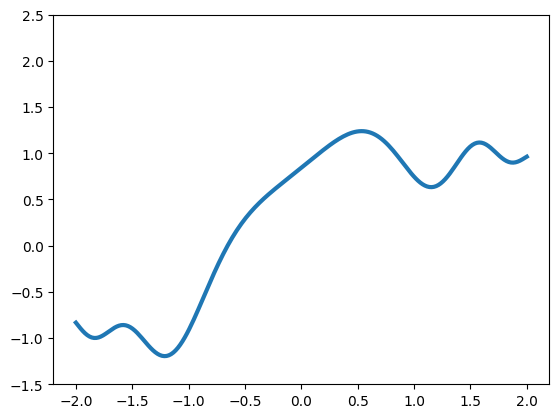

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from moviepy.editor import VideoClip
from moviepy.video.io.bindings import mplfig_to_npimage

x = np.linspace(-2, 2, 200)

duration = 2

fig, ax = plt.subplots()
def make_frame(t):
    ax.clear()
    ax.plot(x, np.sinc(x**2) + np.sin(x + 2*np.pi/duration * t), lw=3)
    ax.set_ylim(-1.5, 2.5)
    return mplfig_to_npimage(fig)

animation = VideoClip(make_frame, duration=duration)
animation.ipython_display(fps=20, loop=True, autoplay=True)